<a href="https://colab.research.google.com/github/Mcube100/Deep_Learning_Projects_for_Coders/blob/main/fastAI_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Imports all functions from fastai.vision.all for computer vision tasks
from fastai.vision.all import *

In [4]:
# Download and extract the dataset of pet images from the given URL
path = untar_data(URLs.PETS)

In [5]:
# List the contents (files and directories) of the 'path' directory
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [6]:
# Get a list of file paths for all the images in the 'images' directory within 'path'
files = get_image_files(path/"images")

# Calculate the total number of image files found
len(files)


7390

In [7]:
# Retrieve the file paths of the first and seventh image in the 'files' list
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_154.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_150.jpg'))

In [8]:
# Define a function 'label_func' that returns True if the first character of the file name is uppercase, indicating it's a pet name, otherwise False
def label_func(f): return f[0].isupper()

In [9]:
# Create a DataLoaders object for image classification tasks using the provided dataset path, file paths, and label function,
# with image resizing to 224x224 pixels
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

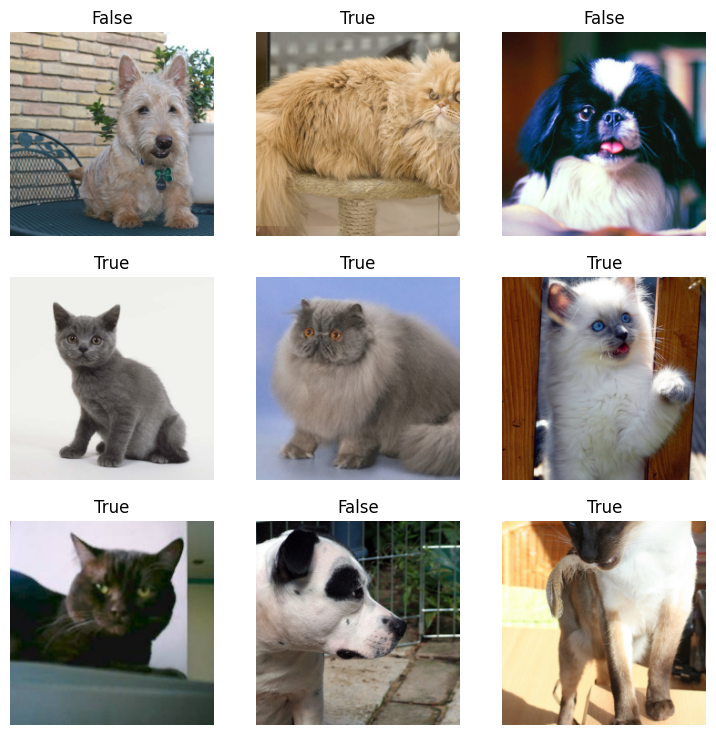

In [10]:
#We can then check if everything looks okay with the show_batch method (True is for cat, False is for dog):
dls.show_batch()

In [11]:
# Create a vision learner using the provided DataLoaders object, using the ResNet34 architecture,
# and measuring performance with error_rate metric
learn = vision_learner(dls, resnet34, metrics=error_rate)

# Fine-tune the model for 1 epoch
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 129MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.148545,0.032181,0.008796,00:43


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,0.050659,0.013053,0.005413,00:45


In [12]:
# Make a prediction on the first image file in the 'files' list using the trained model
learn.predict(files[0])

('False', tensor(0), tensor([1.0000e+00, 3.0468e-06]))

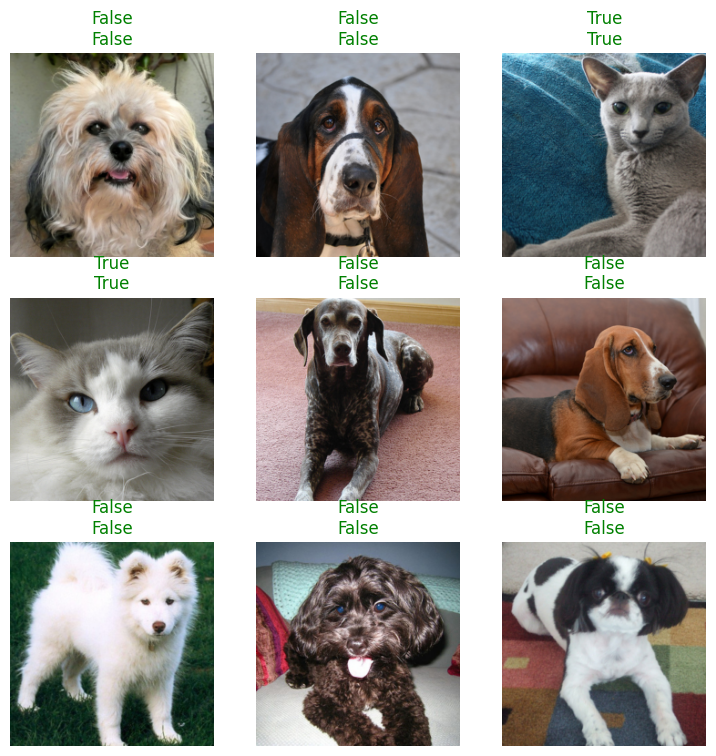

In [13]:
# Display the results of model predictions on the validation set
learn.show_results()